In [1]:
import numpy as np
import ast

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from scipy import *
import scipy
import scipy.interpolate
import matplotlib

In [ ]:

f = open('/Users/evatakou/noise_est/sims/surface_code_bare_ancilla_varying_error_rates/std_5_10_minus_4_N_5_10_6_repeat_50/stims_for_d_3_r_3_std_5_10_minus_4_N_5_10__6_repeat_50.txt', 'r')
all_LE_stim = f.read()

# with open('/Users/evatakou/noise_est/sims/surface_code_bare_ancilla_varying_error_rates/std_5_10_minus_4_N_5_10_6_repeat_50/stims_for_d_3_r_3_std_5_10_minus_4_N_5_10__6_repeat_50.txt') as fp:
#     contents = fp.read()
#     for entry in contents:
#         print(entry)
with open('/Users/evatakou/noise_est/sims/surface_code_bare_ancilla_varying_error_rates/std_5_10_minus_4_N_5_10_6_repeat_50/stims_for_d_3_r_3_std_5_10_minus_4_N_5_10__6_repeat_50.txt', 'r') as f:
    all_LE_stim_str = f.read()

with open('/Users/evatakou/noise_est/sims/surface_code_bare_ancilla_varying_error_rates/std_5_10_minus_4_N_5_10_6_repeat_50/our_for_d_3_r_3_std_5_10_minus_4_N_5_10__6_repeat_50.txt', 'r') as f:
    all_LE_mine_str = f.read()

with open("/Users/evatakou/noise_est/sims/surface_code_bare_ancilla_varying_error_rates/std_5_10_minus_4_N_5_10_6_repeat_50/ps_for_d_3_r_3_std_5_10_minus_4_N_5_10__6_repeat_50.txt", "r") as f:
    prange_data_str = f.read()

with open("/Users/evatakou/noise_est/sims/surface_code_bare_ancilla_varying_error_rates/std_5_10_minus_4_N_5_10_6_repeat_50/pGs_for_d_3_r_3_std_5_10_minus_4_N_5_10__6_repeat_50.txt", "r") as f:
    prange_gate_str = f.read()    
with open("/Users/evatakou/noise_est/sims/surface_code_bare_ancilla_varying_error_rates/std_5_10_minus_4_N_5_10_6_repeat_50/std_our_DEM_for_d_3_r_3_std_5_10_minus_4_N_5_10__6_repeat_50.txt", "r") as f:
    all_std_mine_str = f.read()            


all_LE_stim = ast.literal_eval(all_LE_stim_str)
all_LE_mine = ast.literal_eval(all_LE_mine_str)
prange_data = ast.literal_eval(prange_data_str)
prange_gate = ast.literal_eval(prange_gate_str)
all_std_mine = ast.literal_eval(all_std_mine_str)

In [ ]:
#Get max/min improvement factor:


improvement_factor = []

 
for k in range(len(prange_data)):
    
    temp1 = all_LE_mine[k]
    temp2 = all_LE_stim[k]
    temp  = []

    for l in range(len(prange_gate)):

        temp.append( abs(temp1[l]-temp2[l])/temp2[l]*100 )  #(xf-x)/x
        
        if temp2[l]<temp1[l]:
            print("stim performs better for (p,q) =",(prange_data[k],prange_gate[l]))
            print("stim:",temp2[l],"ours:",temp1[l])

        
            

    improvement_factor.append(temp)


max_elem = 0
for list1 in improvement_factor: 
    for elem in list1:
        if elem>max_elem:
            max_elem = elem 

min_elem = 100
for list1 in improvement_factor:
    for elem in list1:
        if elem<min_elem:
            min_elem = elem 
print(max_elem)
print(min_elem)




18.25029255187644
3.352152605970873


In [ ]:
#Get max/min standard deviation in our LER:

max_elem = 0
for list1 in all_std_mine: 
    for elem in list1:
        if elem>max_elem:
            max_elem = elem 

min_elem = 100
for list1 in all_std_mine:
    for elem in list1:
        if elem<min_elem:
            min_elem = elem 
print(max_elem)
print(min_elem)



0.000541313076509334
4.2784034405371356e-05


Text(0, 0.5, '$p_G$')

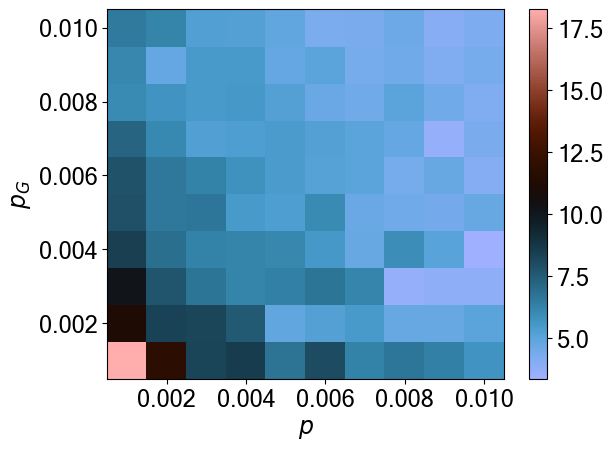

In [ ]:
#Plot the LER improvement:

matplotlib.rcParams.update({'font.size': 17})
plt.rcParams["font.family"] = "Microsoft Sans Serif"   

fig, ax = plt.subplots()


X, Y    = np.meshgrid(prange_data, prange_gate)
Z       = np.array(improvement_factor)



plt.pcolormesh(X, Y, Z, vmin=3.35, vmax=18.25 , cmap=cm.berlin,linewidth=0, antialiased=False,snap=False)#,shading='gouraud'


plt.colorbar()
plt.xlabel("$p$")
plt.ylabel("$p_G$")



Text(0, 0.5, '$p_G$')

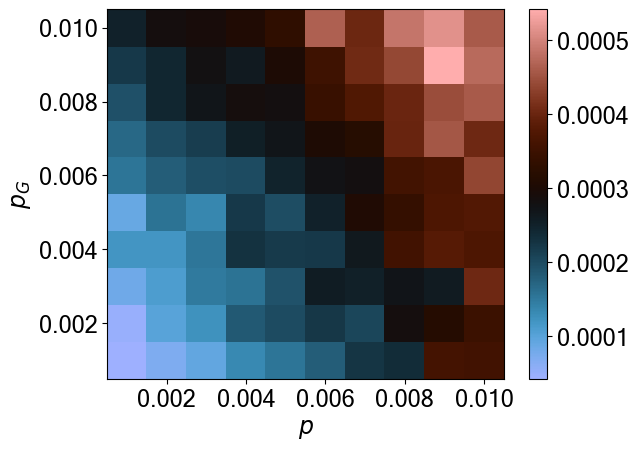

In [8]:
#Plot the standard deviation


fig, ax = plt.subplots()


X, Y    = np.meshgrid(prange_data, prange_gate)
Z       = np.array(all_std_mine)



plt.pcolormesh(X, Y, Z , cmap=cm.berlin,linewidth=0, antialiased=False,snap=False)#,shading='gouraud'

plt.colorbar()
plt.xlabel("$p$")
plt.ylabel("$p_G$")

